# STRATEGIC MANAGEMENT AND PROJECT PERFORMANCE STUDY 

In [168]:
#Study Topic
#INFLUENCE OF STRATEGIC MANAGEMENT ON PERFORMANCE OF HIV AND AIDS INTERVENTIONS MANAGED BY NON-GOVERNMENTAL ORGANISATIONS IN NYANZA REGION, KENYA

In [169]:
#The study was guided by the following objectives: 
#1. To examine the influence of organisations purpose on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#2. To establish the influence of environmental scanning on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#3. To determine the influence of strategy formulation on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#4. To assess the influence of strategy implementation on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#5. To establish the influence of strategy evaluation and control on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#6. To examine the moderating influence of stakeholder participation on the relationship between strategic management and performance of HIV and AIDS interventions managed by NGOs in Nyanza Region. 


In [170]:
#The study sought to test the following research hypotheses: 
#1. H0: There is no significant relationship between organizations purpose and performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
#2. H0: There is no significant relationship between environmental scanning and performance HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
#3. H0: There is no significant relationship between strategy formulation and performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
#4. H0: There is no significant relationship between strategy implementation and performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
#5. H0: There is no significant relationship between strategy evaluation and control on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
#6. H0: There is no significant moderating influence of stakeholder participation on the relationship between strategic management and performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 


In [171]:
#Importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
#Importing the libraries and specifying the variables
strategy_management=pd.read_csv('Strategic_Management.csv')
x = strategy_management.iloc[:,0:6]
y = strategy_management.iloc[:,6]

In [163]:
#Exploring the data
strategy_management.head()

,OrganizationsPurpose,EnvironmentalScanning,StrategyFormulation,StrategyImplementation,StrategyEvaluation,StakeholderParticipation,Project_Perfomance
0,21,23,29,35,28,21,26
1,19,25,24,35,24,19,24
2,21,26,29,38,33,27,29
3,21,26,29,34,29,24,27
4,21,30,24,35,29,24,27


In [70]:
#Exploratory analysis 
strategy_management.describe()

,OrganizationsPurpose,EnvironmentalScanning,StrategyFormulation,StrategyImplementation,StrategyEvaluation,StakeholderParticipation,Project_Perfomance
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,20.78000,26.640000,28.560000,35.060000,29.880000,23.18000,27.340000
std,0.70826,2.663127,1.960425,3.542223,3.185682,3.92111,2.016362
min,19.00000,21.000000,24.000000,27.000000,24.000000,15.00000,23.000000
25%,21.00000,25.000000,28.000000,33.000000,28.000000,21.00000,26.000000
50%,21.00000,26.000000,29.000000,35.000000,29.000000,24.00000,27.500000
75%,21.00000,29.000000,30.000000,38.750000,32.000000,26.00000,29.000000
max,22.00000,30.000000,30.000000,40.000000,35.000000,30.00000,30.000000


In [73]:
#Checking the correlation coefficients 
strategy_management.corr()

,OrganizationsPurpose,EnvironmentalScanning,StrategyFormulation,StrategyImplementation,StrategyEvaluation,StakeholderParticipation,Project_Perfomance
OrganizationsPurpose,1.000000,0.465684,0.413898,0.363290,0.566941,0.499555,0.639350
EnvironmentalScanning,0.465684,1.000000,0.340393,0.595107,0.511992,0.414792,0.722556
StrategyFormulation,0.413898,0.340393,1.000000,0.359480,0.582839,0.188390,0.611689
StrategyImplementation,0.363290,0.595107,0.359480,1.000000,0.512465,0.563429,0.837139
StrategyEvaluation,0.566941,0.511992,0.582839,0.512465,1.000000,0.255000,0.768989
StakeholderParticipation,0.499555,0.414792,0.188390,0.563429,0.255000,1.000000,0.707102
Project_Perfomance,0.639350,0.722556,0.611689,0.837139,0.768989,0.707102,1.000000


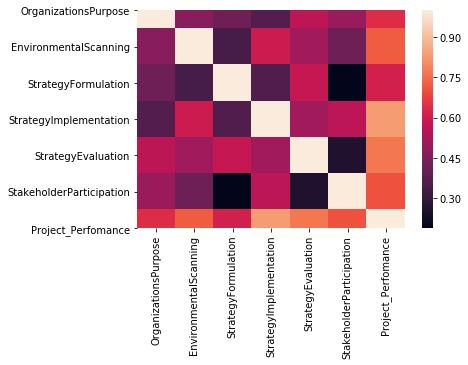

In [74]:
#Visualizing the correlations 
sns.heatmap(strategy_management.corr())

In [75]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

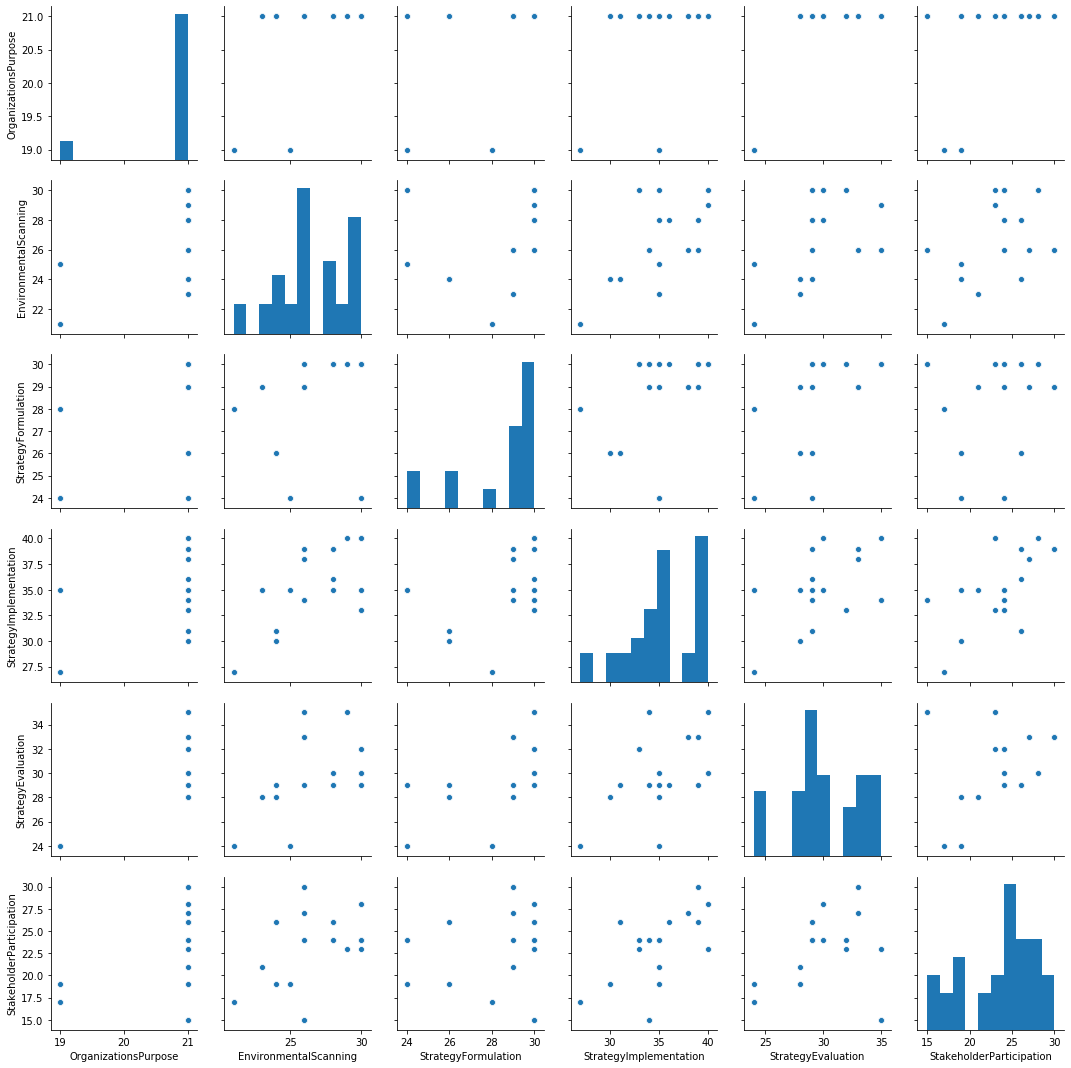

In [76]:
#Exploring the data through visualization 
sns.pairplot(X_train)

In [77]:
#Incorprating the Constant(y intercept )
X=sm.add_constant(X_train)  

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [78]:
#Printing out the regression model output 
model = sm.OLS(y_train, X_train).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Project_Perfomance   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.796e+04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):                    2.17e-60
Time:                        09:32:46   Log-Likelihood:                          5.9579
No. Observations:                  35   AIC:                                    0.08411
Df Residuals:                      29   BIC:                                      9.416
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
OrganizationsPurpose         0.1277      0.035      3.646      0.001       0.056       0.199
EnvironmentalScanning        0.1233      0.019      6.398      0.000       0.084       0.163
StrategyFormulation          0.1878      0.023      8.239      0.000       0.141       0.234
StrategyImplementation       0.1851      0.016     11.353      0.000       0.152       0.218
StrategyEvaluation           0.1926      0.017     11.549      0.000       0.159       0.227
StakeholderParticipation     0.1651      0.012     14.008      0.000       0.141       0.189
==============================================================================
Omnibus:                        4.267   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                1.749
Skew:                           0.111   Prob(JB):                        0.417
Kurtosis:                       1.928   Cond. No.                         70.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
#TESTING THE HYPOTHESES
#1. H0: There is no significant relationship between organizations purpose and performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
mod=ols('Project_Perfomance ~ OrganizationsPurpose',data=strategy_management).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                          sum_sq    df          F        PR(>F)
OrganizationsPurpose   81.434809   1.0  33.186437  5.803798e-07
Residual              117.785191  48.0        NaN           NaN


In [247]:
#2. H0: There is no significant relationship between environmental scanning and performance HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
mod=ols('Project_Perfomance ~ EnvironmentalScanning',data=strategy_management).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                          sum_sq    df          F        PR(>F)
EnvironmentalScanning  104.01017   1.0  52.436688  3.139995e-09
Residual                95.20983  48.0        NaN           NaN


In [249]:
#3. H0: There is no significant relationship between strategy formulation and performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
mod=ols('Project_Perfomance ~ StrategyFormulation',data=strategy_management).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                         sum_sq    df          F    PR(>F)
StrategyFormulation   74.540731   1.0  28.697273  0.000002
Residual             124.679269  48.0        NaN       NaN


In [250]:
#4. H0: There is no significant relationship between strategy implementation and performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
mod=ols('Project_Perfomance ~ StrategyImplementation',data=strategy_management).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                            sum_sq    df           F        PR(>F)
StrategyImplementation  139.613676   1.0  112.428615  3.594597e-14
Residual                 59.606324  48.0         NaN           NaN


In [251]:
#5. H0: There is no significant relationship between strategy evaluation and control on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region 
mod=ols('Project_Perfomance ~ StrategyEvaluation',data=strategy_management).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                        sum_sq    df          F        PR(>F)
StrategyEvaluation  117.807597   1.0  69.458269  6.916793e-11
Residual             81.412403  48.0        NaN           NaN


In [252]:
6. H0: There is no significant moderating influence of stakeholder participation on the relationship between strategic management and performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region
mod=ols('Project_Perfomance ~ StakeholderParticipation',data=strategy_management).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                             sum_sq    df          F        PR(>F)
StakeholderParticipation  99.608595   1.0  47.998646  9.477581e-09
Residual                  99.611405  48.0        NaN           NaN
